In [1]:
import matplotlib
#matplotlib.use('Agg')
from path_data_variable import *
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math
import scipy.stats as stats
plt.style.use('fivethirtyeight')

In [2]:
def standard_units(x):
    return (x - np.mean(x))/np.std(x)

In [3]:
def distance(point1, point2):
    """The distance between two arrays of numbers."""
    return np.sqrt(np.sum((point1 - point2)**2))

def all_distances(training, point):
    """The distance between p (an array of numbers) and the numbers in row i of attribute_table."""
    attributes = training.drop('Class')
    def distance_from_point(row):
        return distance(point, np.array(row))
    return attributes.apply(distance_from_point)

def table_with_distances(training, point):
    """A copy of the training table with the distance from each row to array p."""
    return training.with_column('Distance', all_distances(training, point))

def closest(training, point, k):
    """A table containing the k closest rows in the training table to array p."""
    with_dists = table_with_distances(training, point)
    sorted_by_distance = with_dists.sort('Distance')
    topk = sorted_by_distance.take(np.arange(k))
    return topk

def majority(topkclasses):
    """1 if the majority of the "Class" column is 1s, and 0 otherwise."""
    ones = topkclasses.where('Class', are.equal_to(1)).num_rows
    zeros = topkclasses.where('Class', are.equal_to(0)).num_rows
    if ones > zeros:
        return 1
    else:
        return 0

def classify(training, p, k):
    """Classify an example with attributes p using k-nearest neighbor classification with the given training table."""
    closestk = closest(training, p, k)
    topkclasses = closestk.select('Class')
    return majority(topkclasses)

In [4]:
ckd = Table.read_table(path_data + 'ckd.csv').relabeled('Blood Glucose Random', 'Glucose')
ckd

Age  | Blood Pressure | Specific Gravity | Albumin | Sugar | Red Blood Cells | Pus Cell | Pus Cell clumps | Bacteria   | Glucose | Blood Urea | Serum Creatinine | Sodium | Potassium | Hemoglobin | Packed Cell Volume | White Blood Cell Count | Red Blood Cell Count | Hypertension | Diabetes Mellitus | Coronary Artery Disease | Appetite | Pedal Edema | Anemia | Class
48   | 70             | 1.005            | 4       | 0     | normal          | abnormal | present         | notpresent | 117     | 56         | 3.8              | 111    | 2.5       | 11.2       | 32                 | 6700                   | 3.9                  | yes          | no                | no                      | poor     | yes         | yes    | 1
53   | 90             | 1.02             | 2       | 0     | abnormal        | abnormal | present         | notpresent | 70      | 107        | 7.2              | 114    | 3.7       | 9.5        | 29                 | 12100                  | 3.7                  | yes          | yes               | no                      | poor     | no          | yes    | 1
63   | 70             | 1.01             | 3       | 0     | abnormal        | abnormal | present         | notpresent | 380     | 60         | 2.7              | 131    | 4.2       | 10.8       | 32                 | 4500                   | 3.8                  | yes          | yes               | no                      | poor     | yes         | no     | 1
68   | 80             | 1.01             | 3       | 2     | normal          | abnormal | present         | present    | 157     | 90         | 4.1              | 130    | 6.4       | 5.6        | 16                 | 11000                  | 2.6                  | yes          | yes               | yes                     | poor     | yes         | no     | 1
61   | 80             | 1.015            | 2       | 0     | abnormal        | abnormal | notpresent      | notpresent | 173     | 148        | 3.9              | 135    | 5.2       | 7.7        | 24                 | 9200                   | 3.2                  | yes          | yes               | yes                     | poor     | yes         | yes    | 1
48   | 80             | 1.025            | 4       | 0     | normal          | abnormal | notpresent      | notpresent | 95      | 163        | 7.7              | 136    | 3.8       | 9.8        | 32                 | 6900                   | 3.4                  | yes          | no                | no                      | good     | no          | yes    | 1
69   | 70             | 1.01             | 3       | 4     | normal          | abnormal | notpresent      | notpresent | 264     | 87         | 2.7              | 130    | 4         | 12.5       | 37                 | 9600                   | 4.1                  | yes          | yes               | yes                     | good     | yes         | no     | 1
73   | 70             | 1.005            | 0       | 0     | normal          | normal   | notpresent      | notpresent | 70      | 32         | 0.9              | 125    | 4         | 10         | 29                 | 18900                  | 3.5                  | yes          | yes               | no                      | good     | yes         | no     | 1
73   | 80             | 1.02             | 2       | 0     | abnormal        | abnormal | notpresent      | notpresent | 253     | 142        | 4.6              | 138    | 5.8       | 10.5       | 33                 | 7200                   | 4.3                  | yes          | yes               | yes                     | good     | no          | no     | 1
46   | 60             | 1.01             | 1       | 0     | normal          | normal   | notpresent      | notpresent | 163     | 92         | 3.3              | 141    | 4         | 9.8        | 28                 | 14600                  | 3.2                  | yes          | yes               | no                      | good     | no          | no     | 1
...

In [5]:
ckd = Table().with_columns(
    'Hemoglobin', standard_units(ckd.column('Hemoglobin')),
    'Glucose', standard_units(ckd.column('Glucose')),
    'White Blood Cell Count', standard_units(ckd.column('White Blood Cell Count')),
    'Class', ckd.column('Class')
)

In [6]:
ckd

Hemoglobin | Glucose   | White Blood Cell Count | Class
-0.865744  | -0.221549 | -0.569768              | 1
-1.45745   | -0.947597 | 1.16268                | 1
-1.00497   | 3.84123   | -1.27558               | 1
-2.81488   | 0.396364  | 0.809777               | 1
-2.08395   | 0.643529  | 0.232293               | 1
-1.35303   | -0.561402 | -0.505603              | 1
-0.413266  | 2.04928   | 0.360623               | 1
-1.28342   | -0.947597 | 3.34429                | 1
-1.10939   | 1.87936   | -0.409356              | 1
-1.35303   | 0.489051  | 1.96475                | 1
... (148 rows omitted)

In [7]:
color_table = Table().with_columns(
    'Class', make_array(1, 0),
    'Color', make_array('darkblue', 'gold')
)
ckd = ckd.join('Class', color_table)

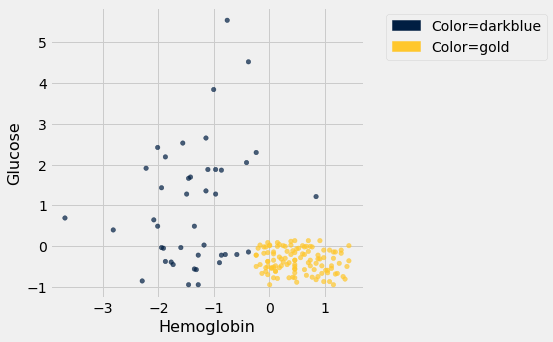

In [8]:
ckd.scatter('Hemoglobin', 'Glucose', group='Color')

In [9]:
def show_closest(point):
    """point = array([x,y]) 
    gives the coordinates of a new point
    shown in red"""
    
    HemoGl = ckd.drop('White Blood Cell Count', 'Color')
    t = closest(HemoGl, point, 1)
    x_closest = t.row(0).item(1)
    y_closest = t.row(0).item(2)
    ckd.scatter('Hemoglobin', 'Glucose', group='Color')
    plt.scatter(point.item(0), point.item(1), color='red', s=30)
    plt.plot(make_array(point.item(0), x_closest), make_array(point.item(1), y_closest), color='k', lw=2);

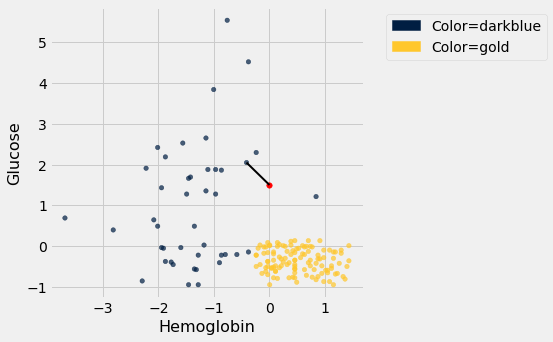

In [10]:
# In this example, Alice's Hemoglobin attribute is 0 and her Glucose is 1.5.
alice = make_array(0, 1.5)
show_closest(alice)

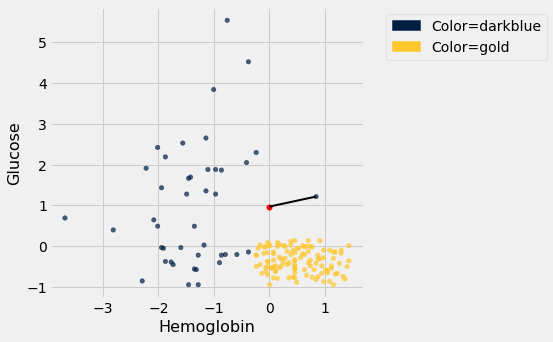

In [11]:
alice = make_array(0, 0.97)
show_closest(alice)

In [12]:
x_array = make_array()
y_array = make_array()
for x in np.arange(-2, 2.1, 0.1):
    for y in np.arange(-2, 2.1, 0.1):
        x_array = np.append(x_array, x)
        y_array = np.append(y_array, y)
        
test_grid = Table().with_columns(
    'Hemoglobin', x_array,
    'Glucose', y_array
)

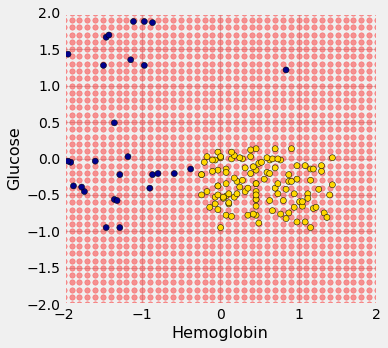

In [13]:
test_grid.scatter('Hemoglobin', 'Glucose', color='red', alpha=0.4, s=30)

plt.scatter(ckd.column('Hemoglobin'), ckd.column('Glucose'), c=ckd.column('Color'), edgecolor='k')

plt.xlim(-2, 2)
plt.ylim(-2, 2);

In [14]:
def classify_grid(training, test, k):
    c = make_array()
    for i in range(test.num_rows):
        # Run the classifier on the ith patient in the test set
        c = np.append(c, classify(training, make_array(test.row(i)), k))   
    return c

In [15]:
c = classify_grid(ckd.drop('White Blood Cell Count', 'Color'), test_grid, 1)

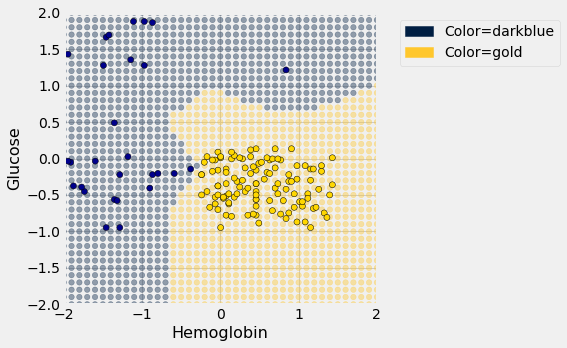

In [16]:
test_grid = test_grid.with_column('Class', c).join('Class', color_table)
test_grid.scatter('Hemoglobin', 'Glucose', group='Color', alpha=0.4, s=30)

plt.scatter(ckd.column('Hemoglobin'), ckd.column('Glucose'), c=ckd.column('Color'), edgecolor='k')

plt.xlim(-2, 2)
plt.ylim(-2, 2);

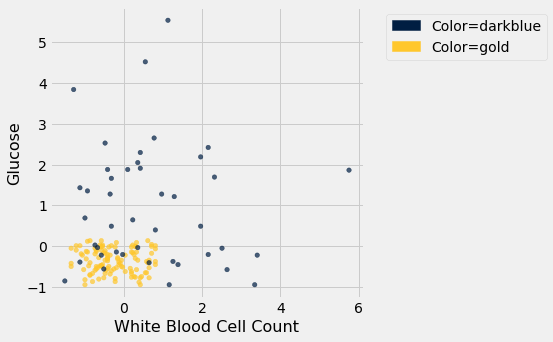

In [17]:
ckd.scatter('White Blood Cell Count', 'Glucose', group='Color')